![](CRISP_DM.png)

In [1]:
#Importing require packages
import pandas as pd
import numpy as np
from datetime import datetime

# Importing packages for plotting
%matplotlib inline
pd.set_option('display.max_rows', 500)

## 3.1 Data Preparation
* Ultimate goal is to understand the final data structure
* needs to be support each step by visual analytics

### 3.1.1 Johns Hopkins GITHUB csv data

In [2]:
#defining the data path and extracting the data
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)

In [3]:
# A look at the data structure
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,955,955,963,963,977,981,989,989,989,1005
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935


In [4]:
# Setting the date columns( from col. no. 4)  as 'time_inde'
time_index=pd_raw.columns[4:]

In [5]:
# Insert 'time_index' into a DataFrame as 'date'
df_plot=pd.DataFrame({'date':time_index})
# A look at the data in 'df_plot'
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
# Checking the FIrst 5 COuntries in the data set
pd_raw['Country/Region'].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

In [7]:
# extracting the data of 'Germany' for FIrst 4 dates and summin the number of cases 
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
# Adding 5 countries to the DataFrame and creating a variable called 'country_list'
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [9]:
# summing the infected-cases for each countries in 'country_list' for all the dates
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

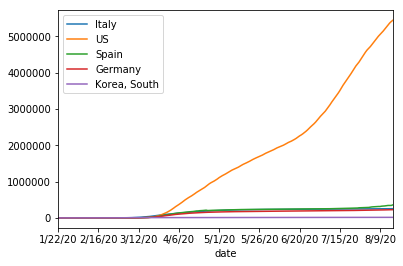

In [10]:
#plotting the data

df_plot.set_index('date').plot()

### 3.1.2 Data Type for Dates in the data set
+ Goal is to convert the 'Date type' into ISO format

In [11]:
# loop over each element to  change the format of each 'date-element' and convert all dates to 'datetime' object
time_idx= [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

# Converting the elemnets inot ISO Norms as string type
time_str= [each.strftime('%Y-%m-%d') for each in time_idx]


In [12]:
# Select 'date'column as index  of dataframe
df_plot['date']=time_idx

#check the data type of 'date'
type(df_plot['date'][0])


pandas._libs.tslib.Timestamp

In [13]:
# take a look at the 'df_plot'
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [14]:
# save the data set with the ISO date format as CSV file in local folder
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## 3.2 Relational data model 
* In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that   uniquely specify a tuple (row) in a relation (table) (source: wiki)

* A primary key’s main features are:
    * 1. It must contain a unique value for each row of data.
    * 2. It cannot contain null values.



In [15]:
# load the file from the specific folder
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# read the data
pd_raw=pd.read_csv(data_path)

# look at the data
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,955,955,963,963,977,981,989,989,989,1005
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935


In [16]:
# Rename the 'Country/Region'  and 'Province'  column as 'country' and 'state' respectively
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})

# Insert 'no' whereever the data in 'state' column is empty/not available
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [17]:
# removing the  coulmns 'Lat' and 'Long'
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)

#Look at the data
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599
1,no,Albania,0,0,0,0,0,0,0,0,...,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499
2,no,Algeria,0,0,0,0,0,0,0,0,...,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025
3,no,Andorra,0,0,0,0,0,0,0,0,...,955,955,963,963,977,981,989,989,989,1005
4,no,Angola,0,0,0,0,0,0,0,0,...,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935


In [18]:
# Creating a new dataframe by making the following changes:


pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},)           
                
# look at the data                
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [19]:
# Checking the data type of evry columns
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [20]:
#change the 'date' column datatype as 'datetime64[ns]'
pd_relational_model['date']=pd.to_datetime(pd_relational_model['date'],utc=False)

# saving the data frame to local folder in CSV format
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)
pd_relational_model.head()
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

# 3.3 Creating relational data frame for each state in 'US' usingJohn Hopkins Dataset 

In [21]:
# load the file from the specific folder
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

# read the data
pd_raw_US=pd.read_csv(data_path)

# look at the data
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,573,575,576,579,581,586,590,598,604,605
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,426,438,442,444,453,457,465,469,469,474
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,788,800,812,816,825,835,848,854,860,863


In [22]:
# removing all non-relevant columns 
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)


# renaming the column 'Province_State' to 'state' 
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [23]:
## repeating the process as done before
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )

# set every value of column 'country' to 'US'
pd_relational_model_US['country']='US'

# convert to datetime object
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] 
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [24]:
# update the large relational file with data of US
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [25]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [26]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [27]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

        confirmed country       date           state
55385         0.0      US 2020-01-22         Alabama
55386         0.0      US 2020-01-22         Alabama
55387         0.0      US 2020-01-22         Alabama
55388         0.0      US 2020-01-22         Alabama
55389         0.0      US 2020-01-22         Alabama
55390         0.0      US 2020-01-22         Alabama
55391         0.0      US 2020-01-22         Alabama
55392         0.0      US 2020-01-22         Alabama
55393         0.0      US 2020-01-22         Alabama
55394         0.0      US 2020-01-22         Alabama
55395         0.0      US 2020-01-22         Alabama
55396         0.0      US 2020-01-22         Alabama
55397         0.0      US 2020-01-22         Alabama
55398         0.0      US 2020-01-22         Alabama
55399         0.0      US 2020-01-22         Alabama
55400         0.0      US 2020-01-22         Alabama
55401         0.0      US 2020-01-22         Alabama
55402         0.0      US 2020-01-22         A

## 3.4 Cross check on full sum US data

In [28]:
cross_check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [29]:
cross_check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1.0
2020-01-23,US,1.0
2020-01-24,US,2.0
2020-01-25,US,2.0
2020-01-26,US,5.0
2020-01-27,US,5.0
2020-01-28,US,5.0
2020-01-29,US,5.0
2020-01-30,US,5.0
